## Working Notebook


In [1]:
# import python libraries
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# open the first data file
title_basics = pd.read_csv('Data/imdb.title.basics.csv.gz')
title_basics.head()
title_basics['start_year'].min()

2010

In [3]:
# open the second data file
title_ratings = pd.read_csv('Data/imdb.title.ratings.csv.gz')
title_ratings.head()


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [4]:
# open the third data file
movie_budgets = pd.read_csv('Data/tn.movie_budgets.csv.gz')
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


# Data Cleaning

Clean the first data frame: title_basics

In [5]:
title_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [6]:
# rename columns for future merging
title_basics.rename(columns = {'primary_title':'movie'}, inplace = True)

In [7]:
# drop columns not being used for analysis
title_basics.drop(columns = ["original_title","runtime_minutes"], inplace=True)

In [8]:
# calculate percentage of nulls in genre
title_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   tconst      146144 non-null  object
 1   movie       146144 non-null  object
 2   start_year  146144 non-null  int64 
 3   genres      140736 non-null  object
dtypes: int64(1), object(3)
memory usage: 4.5+ MB


In [9]:
title_basics['genres'].isna().sum()/146144*100

3.7004598204510617

In [10]:
# drop null values for genres
title_basics.dropna(subset= ['genres'], inplace = True)

In [11]:
title_basics.head()

,tconst,movie,start_year,genres
0,tt0063540,Sunghursh,2013,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,2019,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,2018,Drama
3,tt0069204,Sabse Bada Sukh,2018,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,2017,"Comedy,Drama,Fantasy"


Clean the third data frame: movie_budgets

In [12]:
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [13]:
# change release date to date-time
movie_budgets['release_date'] = pd.to_datetime(movie_budgets['release_date'])

In [14]:
# change production_budget, domestic_gross, and worldwide_budget to integers
movie_budgets['production_budget'] = movie_budgets['production_budget'].replace('[\$,]', '', regex=True).astype(float)
movie_budgets['domestic_gross'] = movie_budgets['domestic_gross'].replace('[\$,]', '', regex=True).astype(float)
movie_budgets['worldwide_gross'] = movie_budgets['worldwide_gross'].replace('[\$,]', '', regex=True).astype(float)

In [15]:
# drop id column
movie_budgets.drop(columns = ["id"], inplace=True)

In [16]:
# drop rows where worldwide_gross or production_budget is 0
movie_budgets = movie_budgets[movie_budgets.worldwide_gross != 0]
movie_budgets = movie_budgets[movie_budgets.production_budget != 0]

In [17]:
# percentage of dropped 0s

In [18]:
# add a profit column to movie_budgets
movie_budgets['profit'] = movie_budgets['worldwide_gross'] - movie_budgets['production_budget']

In [19]:
# calculate profit in millions
movie_budgets['profit_million']=(movie_budgets['profit']/1000000)

In [20]:
# calculate production budget in millions
movie_budgets['production_budget_million']=(movie_budgets['production_budget']/1000000)

In [21]:
# add a column ROI calculating the return on investment
movie_budgets['ROI'] = (movie_budgets['profit'] / movie_budgets['production_budget']) * 100

In [22]:
# round ROI to 2 decimal places
movie_budgets = movie_budgets.round({'ROI': 2})

In [23]:
# add a column for movie year
movie_budgets['year'] = pd.DatetimeIndex(movie_budgets['release_date']).year

In [24]:
movie_budgets.head()
movie_budgets['year'].min()

1915

# Merging Data Tables

In [25]:
# merge title_basics and title_ratings on tconst
imdb_data = pd.merge(title_basics, title_ratings, how = 'inner', on = 'tconst')
imdb_data.head()

,tconst,movie,start_year,genres,averagerating,numvotes
0,tt0063540,Sunghursh,2013,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,2019,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,2018,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,2018,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,2017,"Comedy,Drama,Fantasy",6.5,119


In [26]:
# merge imdb_data with movie_budgets
mdf = pd.merge(imdb_data, movie_budgets, how = 'inner', on = 'movie')

In [27]:
mdf.shape

(2592, 15)

In [28]:
#move the movies with the most votes on imdb up to top
mdf=mdf.sort_values(by='numvotes', ascending = False)

In [29]:
#create a column same year that is 0 if the movies have the same start year 
# and same year from the release date column
mdf['same_year']= mdf['start_year']-mdf['year']

In [30]:
#only include movies from the merge that are coded with the 
# same year to ensure the data is matched up propoerly
mdf = mdf.loc[mdf['same_year']== 0]

In [31]:
# drop duplicate titles
mdf = mdf.drop_duplicates(subset='movie')

In [32]:
# drop tconst, unnecessary after merge
mdf.drop(columns = ["tconst"], inplace=True)

In [33]:
mdf.shape

(1357, 15)

The IMDB data contains movies only from 2010 on. The movie budgets table has movies ranging back to 1915, so we figured that when we merge the two tables we will be limited in the number of movies that are shared between the two tables. 

To make sure our merge of IMDB data with the movie budgets provided us with a good number of data, before merging we looked at the mean ROI from the movie budgets table for the years after 2010.  Then we compared it to the mean ROI after merging the two tables.

In [34]:
movie_budgets_filtered = movie_budgets[movie_budgets['year'] >= 2010]

In [35]:
movie_budgets_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1922 entries, 1 to 5772
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   release_date               1922 non-null   datetime64[ns]
 1   movie                      1922 non-null   object        
 2   production_budget          1922 non-null   float64       
 3   domestic_gross             1922 non-null   float64       
 4   worldwide_gross            1922 non-null   float64       
 5   profit                     1922 non-null   float64       
 6   profit_million             1922 non-null   float64       
 7   production_budget_million  1922 non-null   float64       
 8   ROI                        1922 non-null   float64       
 9   year                       1922 non-null   int64         
dtypes: datetime64[ns](1), float64(7), int64(1), object(1)
memory usage: 165.2+ KB


This shows that the movie budgets has a total of 1922 movies after 2010 listed, after merging with the IMDB data we were able to keep records for 1357 of those movies.

In [36]:
movie_budgets_filtered['ROI'].mean()

266.4769458896982

In [37]:
mdf['ROI'].mean()

298.720729550479

The mean ROI for the data before merging is slightly lower than the data after merging, however they are close enough to continue working with the reduced amount of data.

We then explored how to proceed with the gernes. First we investigated whether a subset of the  combined genres would represent enough of the movie data to look at the combined genres as individual categories.

In [38]:
mdf['genres'].value_counts()

Adventure,Animation,Comedy    67
Action,Adventure,Sci-Fi       51
Comedy,Drama,Romance          49
Comedy                        48
Comedy,Drama                  42
                              ..
Comedy,Drama,Mystery           1
Comedy,Sport                   1
Action,Horror,Thriller         1
Comedy,Mystery,Sci-Fi          1
Comedy,Horror,Sci-Fi           1
Name: genres, Length: 214, dtype: int64

There are 214 unique genre combinations. We look at the top 20 genres (about 10% of the total genres) to see if that represented enough of the data set to proceed with the combined genres.

In [39]:
mdf_combined_genres = mdf[mdf['genres'].map(mdf['genres'].value_counts() >= 17)]

In [40]:
mdf_combined_genres['genres'].value_counts()

Adventure,Animation,Comedy    67
Action,Adventure,Sci-Fi       51
Comedy,Drama,Romance          49
Comedy                        48
Comedy,Drama                  42
Comedy,Romance                40
Drama                         40
Action,Crime,Drama            38
Drama,Romance                 32
Action,Adventure,Fantasy      31
Action,Comedy,Crime           29
Horror,Mystery,Thriller       29
Action,Adventure,Drama        26
Action,Crime,Thriller         21
Crime,Drama,Thriller          21
Drama,Thriller                21
Biography,Drama,History       20
Horror,Thriller               20
Action,Adventure,Comedy       20
Biography,Comedy,Drama        17
Name: genres, dtype: int64

In [41]:
mdf_combined_genres['genres'].value_counts().sum()

662

In [42]:
662/1357

0.48784082535003687

The top 20 combined genres, which is about 10% of the combined genres, represent less than 50% of the movies in the data. For that reason, it will be more helpful to look at the movies separated into single genres.

# separating genres

In [43]:
# separate genres into lists
mdf["genres"] = mdf["genres"].apply(lambda x: x.split(",") if type(x) == str else x)

In [44]:
mdf.shape

(1357, 15)

In [45]:
mdf.head()

,movie,start_year,genres,averagerating,numvotes,release_date,production_budget,domestic_gross,worldwide_gross,profit,profit_million,production_budget_million,ROI,year,same_year
510,Inception,2010,"[Action, Adventure, Sci-Fi]",8.8,1841066,2010-07-16,160000000.0,292576195.0,8.355246e+08,6.755246e+08,675.524642,160.0,422.20,2010,0
477,The Dark Knight Rises,2012,"[Action, Thriller]",8.4,1387769,2012-07-20,275000000.0,448139099.0,1.084439e+09,8.094391e+08,809.439099,275.0,294.34,2012,0
96,Interstellar,2014,"[Adventure, Drama, Sci-Fi]",8.6,1299334,2014-11-05,165000000.0,188017894.0,6.663794e+08,5.013794e+08,501.379375,165.0,303.87,2014,0
1296,Django Unchained,2012,"[Drama, Western]",8.4,1211405,2012-12-25,100000000.0,162805434.0,4.499483e+08,3.499483e+08,349.948323,100.0,349.95,2012,0
110,The Avengers,2012,"[Action, Adventure, Sci-Fi]",8.1,1183655,2012-05-04,225000000.0,623279547.0,1.517936e+09,1.292936e+09,1292.935897,225.0,574.64,2012,0


In [46]:
#explode the genres
mdf2 = mdf.explode('genres')

In [47]:
mdf2['genres'].unique()

array(['Action', 'Adventure', 'Sci-Fi', 'Thriller', 'Drama', 'Western',
       'Biography', 'Crime', 'Mystery', 'Comedy', 'Family', 'Fantasy',
       'Animation', 'Romance', 'Music', 'History', 'Horror', 'Sport',
       'War', 'Musical', 'Documentary'], dtype=object)

In [48]:
len(mdf2['genres'].unique())

21

In [49]:
#removed 'The Gallows' and 'The Devil Inside' as an outlier for the return on investmest
no_gallows = mdf2.drop(index = 1722).sort_values(by="ROI",ascending = False)

In [50]:
no_gallows = no_gallows.drop(index = 782).sort_values(by="ROI",ascending = False)

In [51]:
sorted_genres = no_gallows.groupby(["genres"], as_index=False).mean().sort_values(by = "ROI", ascending=False)

top3genres = list(sorted_genres['genres'].values[0:3])
top3genres

['Horror', 'Mystery', 'Thriller']

In [52]:
pos_ROI = no_gallows[no_gallows['ROI'] > 0]
sorted_genres3 = pos_ROI.groupby(["genres"], as_index=False).mean().sort_values(by = "ROI", ascending=False)

top3genres_v2 = list(sorted_genres3['genres'].values[0:3])
top3genres_v2


['Horror', 'Mystery', 'Thriller']

In [53]:
sorted_genres

,genres,start_year,averagerating,numvotes,production_budget,domestic_gross,worldwide_gross,profit,profit_million,production_budget_million,ROI,year,same_year
11,Horror,2014.182432,5.718243,77480.290541,2.064483e+07,3.618621e+07,7.950220e+07,5.885737e+07,58.857371,20.644831,635.544324,2014.182432,0.0
14,Mystery,2014.200000,6.190435,135118.060870,2.644637e+07,4.246262e+07,9.798276e+07,7.153639e+07,71.536385,26.446371,598.706087,2014.200000,0.0
18,Thriller,2013.753247,6.129004,133254.857143,3.568663e+07,4.924466e+07,1.279535e+08,9.226690e+07,92.266902,35.686635,419.959437,2013.753247,0.0
16,Sci-Fi,2014.388889,6.565873,286807.888889,9.956806e+07,1.329984e+08,3.647116e+08,2.651435e+08,265.143504,99.568056,283.657778,2014.388889,0.0
2,Animation,2014.193878,6.574490,128583.132653,1.001939e+08,1.407021e+08,3.887555e+08,2.885616e+08,288.561604,100.193878,278.690204,2014.193878,0.0
15,Romance,2013.072626,6.338547,82429.480447,2.310958e+07,3.410309e+07,7.047518e+07,4.736560e+07,47.365597,23.109581,267.470168,2013.072626,0.0
12,Music,2013.723404,6.389362,69891.170213,1.812872e+07,3.564235e+07,7.776171e+07,5.963299e+07,59.632989,18.128723,261.097021,2013.723404,0.0
3,Biography,2014.784615,7.051538,113389.415385,2.651900e+07,4.041363e+07,8.309290e+07,5.657390e+07,56.573903,26.519000,248.377846,2014.784615,0.0
7,Drama,2013.860360,6.596396,106750.448949,2.838700e+07,3.581019e+07,7.877166e+07,5.038466e+07,50.384662,28.386996,238.584444,2013.860360,0.0
4,Comedy,2013.627083,6.240625,98136.629167,4.240746e+07,6.237079e+07,1.424374e+08,1.000299e+08,100.029917,42.407458,228.190208,2013.627083,0.0


# Question 3

How does the amount of money invested into the movie (aka the production budget) impact the return on investment?

The relationship for all movies shown below.

In [54]:
#fig, ax = plt.subplots(figsize=(16,8))

#ax.scatter(mdf2['production_budget_million'], mdf2['ROI'])
#ax.set_title('ROI vs. Production Budget')
#ax.set_xlabel('Production Budget (in Millions)')
#ax.set_ylabel('Return on Investment');

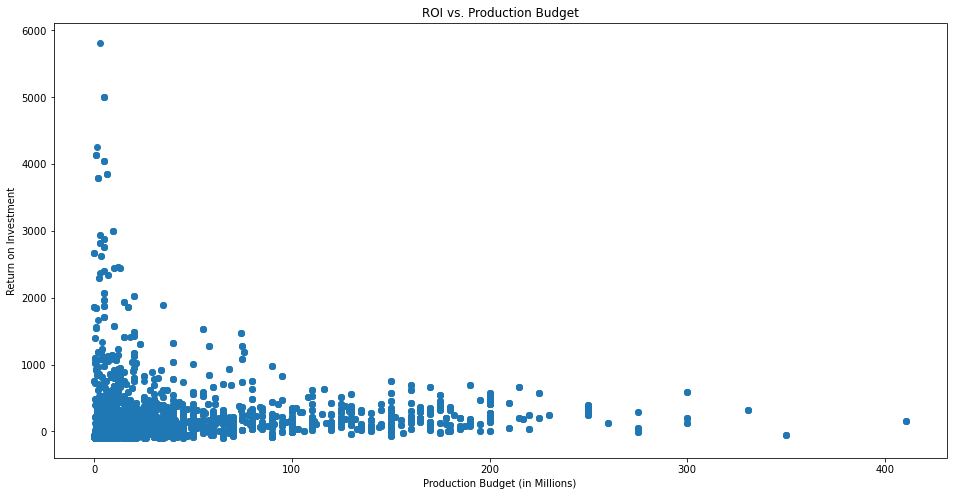

In [55]:
fig, ax = plt.subplots(figsize=(16,8))

ax.scatter(no_gallows['production_budget_million'], no_gallows['ROI'])
ax.set_title('ROI vs. Production Budget')
ax.set_xlabel('Production Budget (in Millions)')
ax.set_ylabel('Return on Investment');

The relationship between production budget and ROI representing only the top 5 genres.

In [56]:
top3genres

['Horror', 'Mystery', 'Thriller']

Including negative ROI

In [57]:
boolean_series = no_gallows.genres.isin(top3genres)
filtered_top3_df = no_gallows[boolean_series]
filtered_top3_df

,movie,start_year,genres,averagerating,numvotes,release_date,production_budget,domestic_gross,worldwide_gross,profit,profit_million,production_budget_million,ROI,year,same_year
755,Paranormal Activity 2,2010,Horror,5.7,93122,2010-10-20,3000000.0,84752907.0,177512032.0,174512032.0,174.512032,3.0,5817.07,2010,0
2402,Get Out,2017,Thriller,7.7,400474,2017-02-24,5000000.0,176040665.0,255367951.0,250367951.0,250.367951,5.0,5007.36,2017,0
2402,Get Out,2017,Horror,7.7,400474,2017-02-24,5000000.0,176040665.0,255367951.0,250367951.0,250.367951,5.0,5007.36,2017,0
2402,Get Out,2017,Mystery,7.7,400474,2017-02-24,5000000.0,176040665.0,255367951.0,250367951.0,250.367951,5.0,5007.36,2017,0
1446,Chernobyl Diaries,2012,Thriller,5.0,60304,2012-05-25,1000000.0,18119640.0,42411721.0,41411721.0,41.411721,1.0,4141.17,2012,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1166,Trade of Innocents,2012,Thriller,5.4,860,2012-10-05,5800000.0,15091.0,15091.0,-5784909.0,-5.784909,5.8,-99.74,2012,0
1224,Freaks of Nature,2015,Horror,5.9,9670,2015-10-30,33000000.0,70958.0,70958.0,-32929042.0,-32.929042,33.0,-99.78,2015,0
724,Area 51,2015,Horror,4.2,11537,2015-05-15,5000000.0,7556.0,7556.0,-4992444.0,-4.992444,5.0,-99.85,2015,0
724,Area 51,2015,Thriller,4.2,11537,2015-05-15,5000000.0,7556.0,7556.0,-4992444.0,-4.992444,5.0,-99.85,2015,0


Looking at top 3 genres with only positive ROI

In [58]:
boolean_series = pos_ROI.genres.isin(top3genres)
pos_top3_df = pos_ROI[boolean_series]
pos_top3_df

,movie,start_year,genres,averagerating,numvotes,release_date,production_budget,domestic_gross,worldwide_gross,profit,profit_million,production_budget_million,ROI,year,same_year
755,Paranormal Activity 2,2010,Horror,5.7,93122,2010-10-20,3000000.0,84752907.0,177512032.0,174512032.0,174.512032,3.00,5817.07,2010,0
2402,Get Out,2017,Thriller,7.7,400474,2017-02-24,5000000.0,176040665.0,255367951.0,250367951.0,250.367951,5.00,5007.36,2017,0
2402,Get Out,2017,Horror,7.7,400474,2017-02-24,5000000.0,176040665.0,255367951.0,250367951.0,250.367951,5.00,5007.36,2017,0
2402,Get Out,2017,Mystery,7.7,400474,2017-02-24,5000000.0,176040665.0,255367951.0,250367951.0,250.367951,5.00,5007.36,2017,0
1446,Chernobyl Diaries,2012,Thriller,5.0,60304,2012-05-25,1000000.0,18119640.0,42411721.0,41411721.0,41.411721,1.00,4141.17,2012,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,Take Shelter,2011,Thriller,7.4,83200,2011-09-30,4750000.0,1728953.0,4972016.0,222016.0,0.222016,4.75,4.67,2011,0
989,Take Shelter,2011,Horror,7.4,83200,2011-09-30,4750000.0,1728953.0,4972016.0,222016.0,0.222016,4.75,4.67,2011,0
1075,Scouts Guide to the Zombie Apocalypse,2015,Horror,6.3,40479,2015-10-30,15000000.0,3703046.0,15554855.0,554855.0,0.554855,15.00,3.70,2015,0
1046,Alex Cross,2012,Mystery,5.1,30951,2012-10-19,35000000.0,25888412.0,35426759.0,426759.0,0.426759,35.00,1.22,2012,0


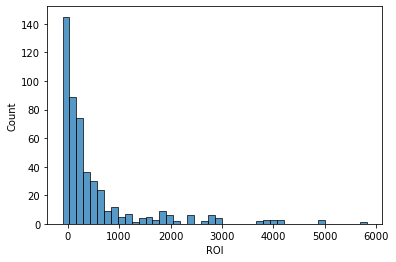

In [59]:
sns.histplot(data=filtered_top3_df, x='ROI');

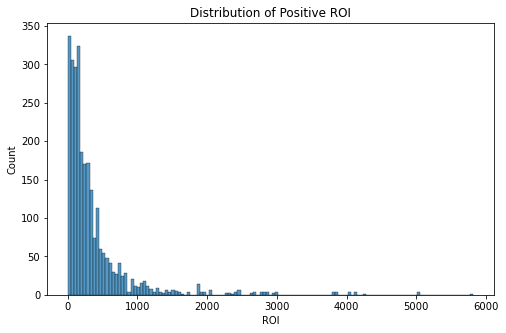

In [60]:
fig, ax = plt.subplots(figsize=(8,5))
ax = sns.histplot(data=pos_ROI, x='ROI')
ax.set_title("Distribution of Positive ROI")
fig.savefig('images/histogram_posROI');

In [61]:
from scipy import stats
stats.pearsonr(filtered_top3_df['production_budget_million'], filtered_top3_df['ROI'])

(-0.21284689993153635, 1.8097857067055707e-06)

''

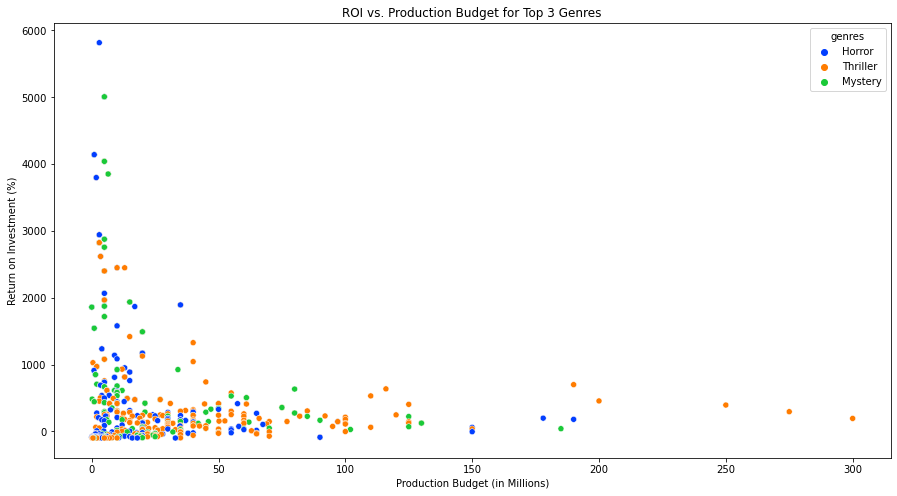

In [62]:
fig, ax = plt.subplots(figsize=(15,8))

ax = sns.scatterplot(x='production_budget_million', y='ROI', data=filtered_top3_df, 
                     hue='genres', palette = 'bright')
ax.set_title('ROI vs. Production Budget for Top 3 Genres')
ax.set_xlabel('Production Budget (in Millions)')
ax.set_ylabel('Return on Investment (%)')
#fig.savefig('images/scatterplot_top3_allROI')


;


In [63]:
from scipy import stats
corr = stats.pearsonr(pos_top3_df['production_budget_million'], pos_top3_df['ROI'])

(-0.3018129654000702, 2.9813761975967648e-09)


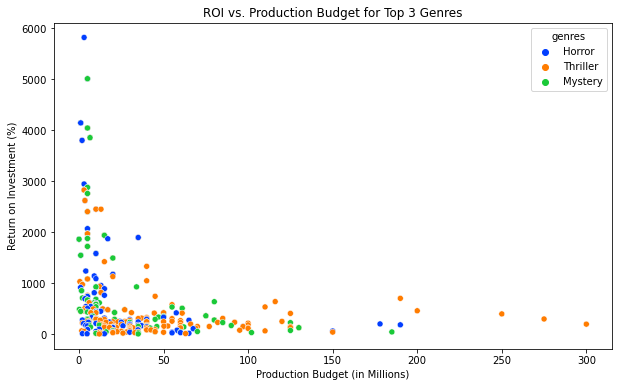

In [64]:
fig, ax = plt.subplots(figsize=(10,6))

ax = sns.scatterplot(x='production_budget_million', y='ROI', data=pos_top3_df, 
                     hue='genres', palette = 'bright')
ax.set_title('ROI vs. Production Budget for Top 3 Genres')
ax.set_xlabel('Production Budget (in Millions)')
ax.set_ylabel('Return on Investment (%)')
fig.savefig('images/scatterplot_top3_posROI');

print(corr)

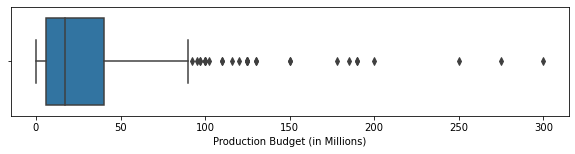

In [65]:
fig,ax = plt.subplots(figsize=(10,2))
ax= sns.boxplot(data = pos_top3_df, x = 'production_budget_million')
ax.set_xlabel('Production Budget (in Millions)')
fig.savefig('images/boxplot_top3_posROI');

Looking at the relationship between production budget and ROI separated by individual top 5 genres.

In [66]:
#genre1 = top3genres[0]
#genre2 = top3genres[1]
#genre3 = top3genres[2]
#genre4 = top5genres_v2[3]
#genre5 = top5genres_v2[4]

In [67]:
#boolean_series1 = (no_gallows['genres'] == genre1)
#genre1_df = no_gallows[boolean_series1]

In [68]:
#fig, ax = plt.subplots(figsize=(15,8))

#ax.scatter(genre1_df['production_budget_million'], genre1_df['ROI'], c = 'red')
#ax.set_title('ROI vs. Production Budget for Horror Movies')
#ax.set_xlabel('Production Budget (in Millions)')
#ax.set_ylabel('Return on Investment (%)');

In [69]:
#boolean_series2 = (no_gallows['genres'] == genre2)
#genre2_df = no_gallows[boolean_series2]

In [70]:
#fig, ax = plt.subplots(figsize=(15,8))

#ax.scatter(genre2_df['production_budget_million'], genre2_df['ROI'], c = 'green')
#ax.set_title('ROI vs. Production Budget for Mystery Movies')
#ax.set_xlabel('Production Budget (in Millions)')
#ax.set_ylabel('Return on Investment (%)');

In [71]:
#boolean_series3 = (no_gallows['genres'] == genre3)
#genre3_df = no_gallows[boolean_series3]

In [72]:
#fig, ax = plt.subplots(figsize=(15,8))

#ax.scatter(genre3_df['production_budget_million'], genre3_df['ROI'], c = 'blue')
#ax.set_title('ROI vs. Production Budget for Thriller Movies')
#ax.set_xlabel('Production Budget (in Millions)')
#ax.set_ylabel('Return on Investment (%)');

In [73]:
#from scipy import stats
#def corrfunc(x, y, **kws):
#    r, _ = stats.pearsonr(x, y)
#    ax = plt.gca()
#    ax.annotate("r = {:.2f}".format(r),
#                xy=(.1, .9), xycoords=ax.transAxes)
#sns.set(font_scale=1.5)
#g = sns.FacetGrid(filtered_top3_df, col="genres", 
#                  height= 5, aspect=.9, hue='genres', )
#g.map(sns.scatterplot, "production_budget_million", "ROI")
#g.map(corrfunc, "production_budget_million", "ROI")
#g.fig.subplots_adjust(top=.7)
#g.fig.suptitle('Return on Investment vs. Production Budget by Top 5 Genres')
#g.savefig("output.png")
#;